In [1]:
#Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Training set and Testing Set 
from sklearn.model_selection import train_test_split
# Import Training Model
from sklearn.linear_model import LinearRegression

In [44]:
#create a simple data frame 
df1 = pd.read_csv('vehicles.csv')

df = pd.DataFrame(None)
df['year']= df1['year']
df['range']= df1['range']
df['cylinders']= df1['cylinders']
df1.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43849 entries, 0 to 43848
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        43849 non-null  float64
 1   barrelsA08       43849 non-null  float64
 2   charge120        43849 non-null  float64
 3   charge240        43849 non-null  float64
 4   city08           43849 non-null  int64  
 5   city08U          43849 non-null  float64
 6   cityA08          43849 non-null  int64  
 7   cityA08U         43849 non-null  float64
 8   cityCD           43849 non-null  float64
 9   cityE            43849 non-null  float64
 10  cityUF           43849 non-null  float64
 11  co2              43849 non-null  int64  
 12  co2A             43849 non-null  int64  
 13  co2TailpipeAGpm  43849 non-null  float64
 14  co2TailpipeGpm   43849 non-null  float64
 15  comb08           43849 non-null  int64  
 16  comb08U          43849 non-null  float64
 17  combA08     

In [45]:


df.sample(10)

,year,range,cylinders
3598,1996,0,6.0
22505,2011,0,6.0
21295,2010,0,6.0
33633,2019,0,8.0
7912,1986,0,6.0
43007,1992,0,6.0
13136,2006,0,6.0
14072,1986,0,4.0
28537,2016,0,4.0
19449,1984,0,8.0


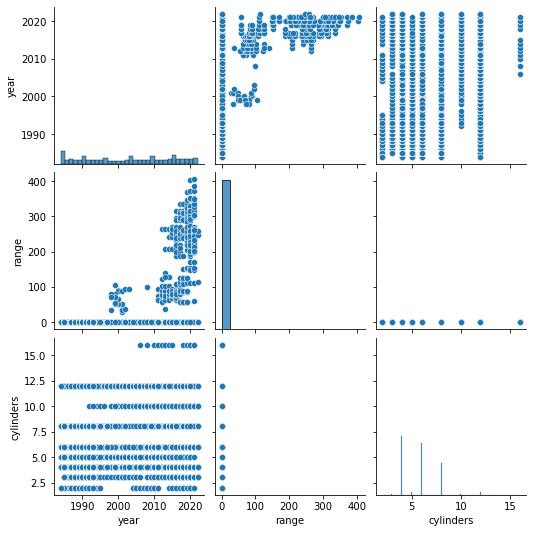

In [46]:
sns.pairplot(df)

In [47]:
df.corr().T

,year,range,cylinders
year,1.000000,0.092354,0.052104
range,0.092354,1.000000,NaN
cylinders,0.052104,NaN,1.000000


In [48]:
#setup and split data 
#drop mpg and origin_europe
X=df.drop(['range'],axis=1);
y=df['range']

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [49]:
#Build Model
lm = LinearRegression()
lm.fit(X_train,y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
#r^2 value
lm.score(X_train,y_train)

0.6788261613212117

In [27]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=["CoEff"])
cdf.T

,weight,cylinders
CoEff,-0.00645,-0.681256


In [28]:
lm.intercept_

46.30701821602575

In [29]:
lm.score(X_train,y_train)

0.6788261613212117

In [30]:
lm.score(X_test,y_test)

0.7388688871334141

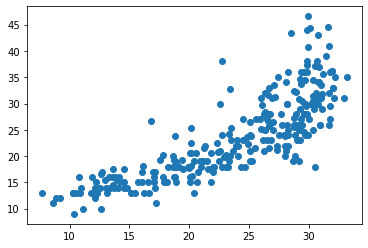

In [31]:
predictions = lm.predict(X_train)
plt.scatter(predictions, y_train)

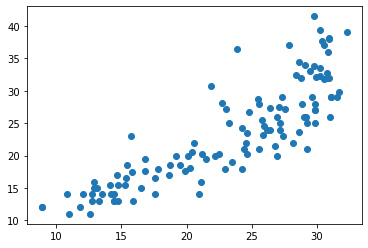

In [32]:
predictions = lm.predict(X_test)
plt.scatter(predictions, y_test)

In [33]:
#more improvements
#adding interactions terms 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)


lm = LinearRegression()
lm.fit(X_train2, y_train)

lm.score(X_train2,y_train)

0.702809404788242

In [34]:
lm.score(X_test2,y_test)

0.750573999115078

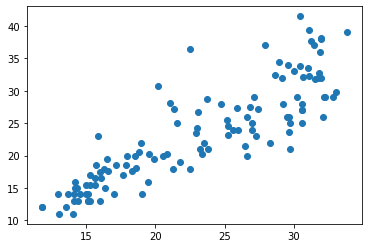

In [35]:
predictions = lm.predict(X_test2)
plt.scatter(predictions, y_test)

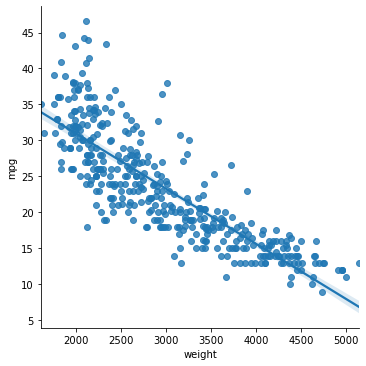

In [36]:
sns.lmplot(data=df, x="weight",y="mpg")